In [1]:
import json
import networkx as nx
import random

In [2]:
tests = True

In [3]:
def gen_grid_graph(dim, weight_range):
    G = nx.grid_2d_graph(*dim).to_directed()
    for u, v in list(G.edges):
        if u[0] > v[0] or u[1] > v[1]:
            G.remove_edge(u, v)
    
    G.add_node('s')
    G.add_node('t')
    for x in G.nodes:
        if x != 's' and x != 't':
            if x[1] == 0:
                G.add_edge('s', x)
            if x[1] == dim[1] - 1:
                G.add_edge(x, 't')
    
    relabel_map = {}
    for x in G.nodes:
        if x != 's' and x != 't':
            relabel_map[x] = x[0] * dim[1] + x[1]
    G = nx.relabel_nodes(G, relabel_map)
    
    for u, v in G.edges:
        G[u][v]['weight'] = random.randint(*weight_range)
    
    return G

In [4]:
def visualize_graph(G):
    pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

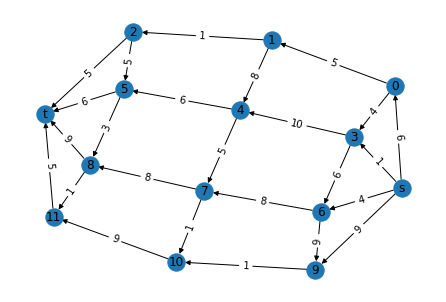

In [5]:
if tests:
    G = gen_grid_graph((4, 3), (1, 10))
    visualize_graph(G)

In [6]:
def gen_int_weights(G, weight_range):
    int_weights = {}
    for u, v in G.edges:
        int_weights[(u, v)] = random.randint(*weight_range)
    return int_weights

In [7]:
def pprint_dict(d):
    print(json.dumps({str(key): d[key] for key in d}, indent=4))

In [8]:
if tests:
    G = gen_grid_graph((5, 5), (1, 10))
    int_weights = gen_int_weights(G, (1, 10))
    pprint_dict(int_weights)

{
    "(0, 5)": 3,
    "(0, 1)": 7,
    "(1, 6)": 2,
    "(1, 2)": 3,
    "(2, 7)": 3,
    "(2, 3)": 8,
    "(3, 8)": 6,
    "(3, 4)": 3,
    "(4, 9)": 4,
    "(4, 't')": 10,
    "(5, 10)": 9,
    "(5, 6)": 4,
    "(6, 11)": 3,
    "(6, 7)": 4,
    "(7, 12)": 3,
    "(7, 8)": 6,
    "(8, 13)": 1,
    "(8, 9)": 4,
    "(9, 14)": 6,
    "(9, 't')": 6,
    "(10, 15)": 1,
    "(10, 11)": 6,
    "(11, 16)": 4,
    "(11, 12)": 7,
    "(12, 17)": 3,
    "(12, 13)": 3,
    "(13, 18)": 10,
    "(13, 14)": 6,
    "(14, 19)": 5,
    "(14, 't')": 1,
    "(15, 20)": 1,
    "(15, 16)": 3,
    "(16, 21)": 2,
    "(16, 17)": 8,
    "(17, 22)": 9,
    "(17, 18)": 1,
    "(18, 23)": 5,
    "(18, 19)": 8,
    "(19, 24)": 2,
    "(19, 't')": 9,
    "(20, 21)": 7,
    "(21, 22)": 8,
    "(22, 23)": 10,
    "(23, 24)": 5,
    "(24, 't')": 5,
    "('s', 0)": 3,
    "('s', 5)": 5,
    "('s', 10)": 7,
    "('s', 15)": 6,
    "('s', 20)": 1
}
